## K Means

- Common clustering techniques
- Example of hard clustering, where every point belongs to a cluster

Application:
It helps to find the optimal location of resturant as closest to the customer

Here K refers to K no. of clusters

### Steps 

- 1: Randomly initialised the centers of each clusters
- 2: Assign each customer to the nearest center
- 3: Update each cener with respect to the mean of locations of customer present in the each cluster
- 4: Repeat 2 and 3 until convergence

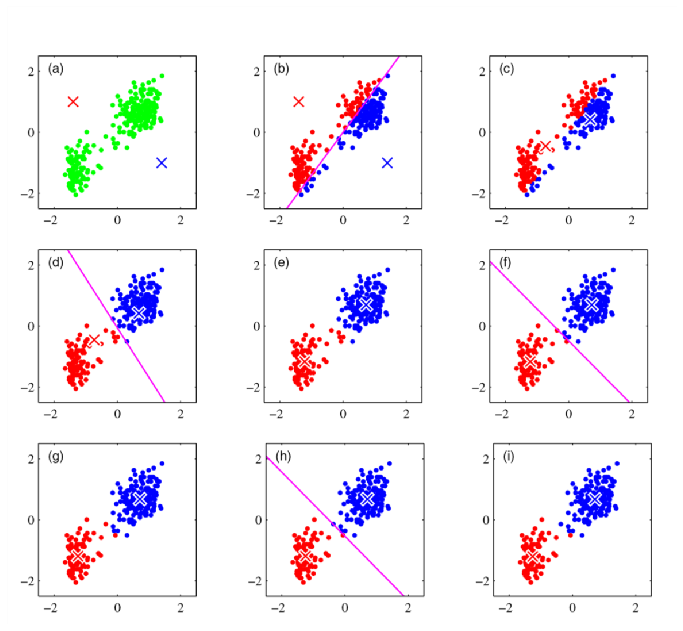

In [64]:
import matplotlib.pyplot as plt
import cv2

img=cv2.imread("k-means.png")

plt.figure(figsize=(12,12))
plt.imshow(img)
plt.axis("off")
plt.show()

## Implementation

In [210]:
import numpy as np
from sklearn.datasets import make_blobs

In [187]:
X,y=make_blobs(n_samples=500,centers=5,random_state=3,n_features=2)

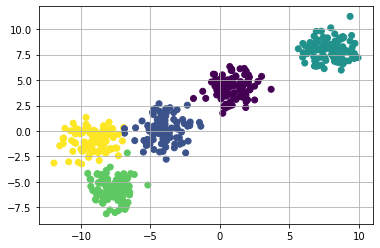

In [188]:
plt.figure(0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

In [211]:
k=5

color=['green','red','blue','yellow','orange']

clusters={}

for cl in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    cluster={
        'center':center,
        'points':points,
        'color':color[cl]
    }
    clusters[cl]=cluster
    print(cluster)

{'center': array([0.26411909, 2.14366409]), 'points': [], 'color': 'green'}
{'center': array([-3.81127757, -0.74877281]), 'points': [], 'color': 'red'}
{'center': array([ 7.75863077, -1.42797961]), 'points': [], 'color': 'blue'}
{'center': array([-5.61393965,  5.83326099]), 'points': [], 'color': 'yellow'}
{'center': array([3.14389459, 9.33612753]), 'points': [], 'color': 'orange'}


In [212]:
center=10*(2*np.random.random((X.shape[1],))-1)
print(center)

[-5.18182877 -0.42861658]


In [213]:
clusters

{0: {'center': array([0.26411909, 2.14366409]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-3.81127757, -0.74877281]),
  'points': [],
  'color': 'red'},
 2: {'center': array([ 7.75863077, -1.42797961]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-5.61393965,  5.83326099]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([3.14389459, 9.33612753]),
  'points': [],
  'color': 'orange'}}

In [214]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [215]:
v1=np.array([3,4])
v2=np.array([0,2])
distance(v1,v2)

3.605551275463989

In [216]:
#Assign each point to the cluster - E step (Expectation)

def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

def assignPointToCluster(clusters):
    for ix in range(X.shape[0]):
        dist=[]
        curr_X=X[ix]

        for kx in range(k):
            d=distance(curr_X,clusters[kx]['center'])
            dist.append(d)

        current_cluster=np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_X)
        
        
def updateClusters(clusters):
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #if the cluster has the non zero points
            new_center=pts.mean(axis=0)
            clusters[kx]['center']=new_center
            clusters[kx]['points']=[] # clear the points
        
def plotClusters(clusters): # M-Step (Maxmization)
    
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        print(pts.shape,clusters[kx]['color'])
        
        #Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[kx]['color'])
        except:
            pass
        
        #Plot the center
        uk=clusters[kx]['center']
        plt.plot(uk[0],uk[1],c="black",marker="*")

(98, 2) green
(295, 2) red
(0,) blue
(2, 2) yellow
(105, 2) orange


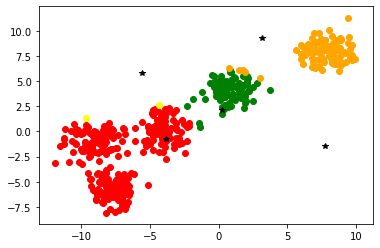

In [217]:
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusters(clusters)

(106, 2) green
(218, 2) red
(0,) blue
(76, 2) yellow
(100, 2) orange


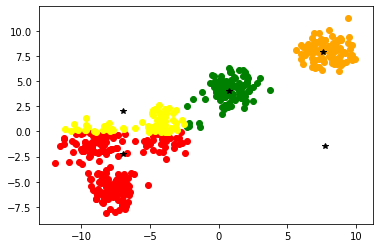

In [218]:
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusters(clusters)

(100, 2) green
(191, 2) red
(0,) blue
(109, 2) yellow
(100, 2) orange


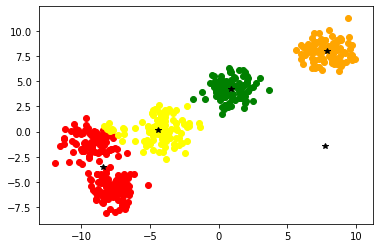

In [221]:
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusters(clusters)